<a href="https://colab.research.google.com/github/Benvial89/js-p6jw6j/blob/master/Prueba_VG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [0]:
# 0.1 load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving vgsales.csv to vgsales.csv
User uploaded file "vgsales.csv" with length 1500459 bytes


In [0]:
# 0.2 load data in DataFrame
df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), decimal=',')

In [0]:
#Al importar los datos, hay una columna extra que aparece porque hay unos juegos que aparecen con sus datos desplazados porque el nombre contería una coma. Por loq eu se van a descartar:
df.rename(columns={'Unnamed: 11': 'Error'},inplace=True)
df=df[df.Error.isna()]

df['NA_Sales']=df['NA_Sales'].str.replace(',', '.')
df['NA_Sales']=df['NA_Sales'].astype(float)

In [0]:
v_Platforms_1 = ['Wii', 'PS3', 'X360']
v_Platforms_2 = ['PS4', 'XOne', 'WiiU']

A continuación se rescata las columnas con las que se va a trabajar.

In [0]:
VG = df[['Rank','Name','Platform','Year','Genre','Publisher',	
         'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

VG1 = VG[df.Platform.isin(v_Platforms_1)]
VG2 = VG[df.Platform.isin(v_Platforms_2)]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'North America Video Game Sales per Genre')

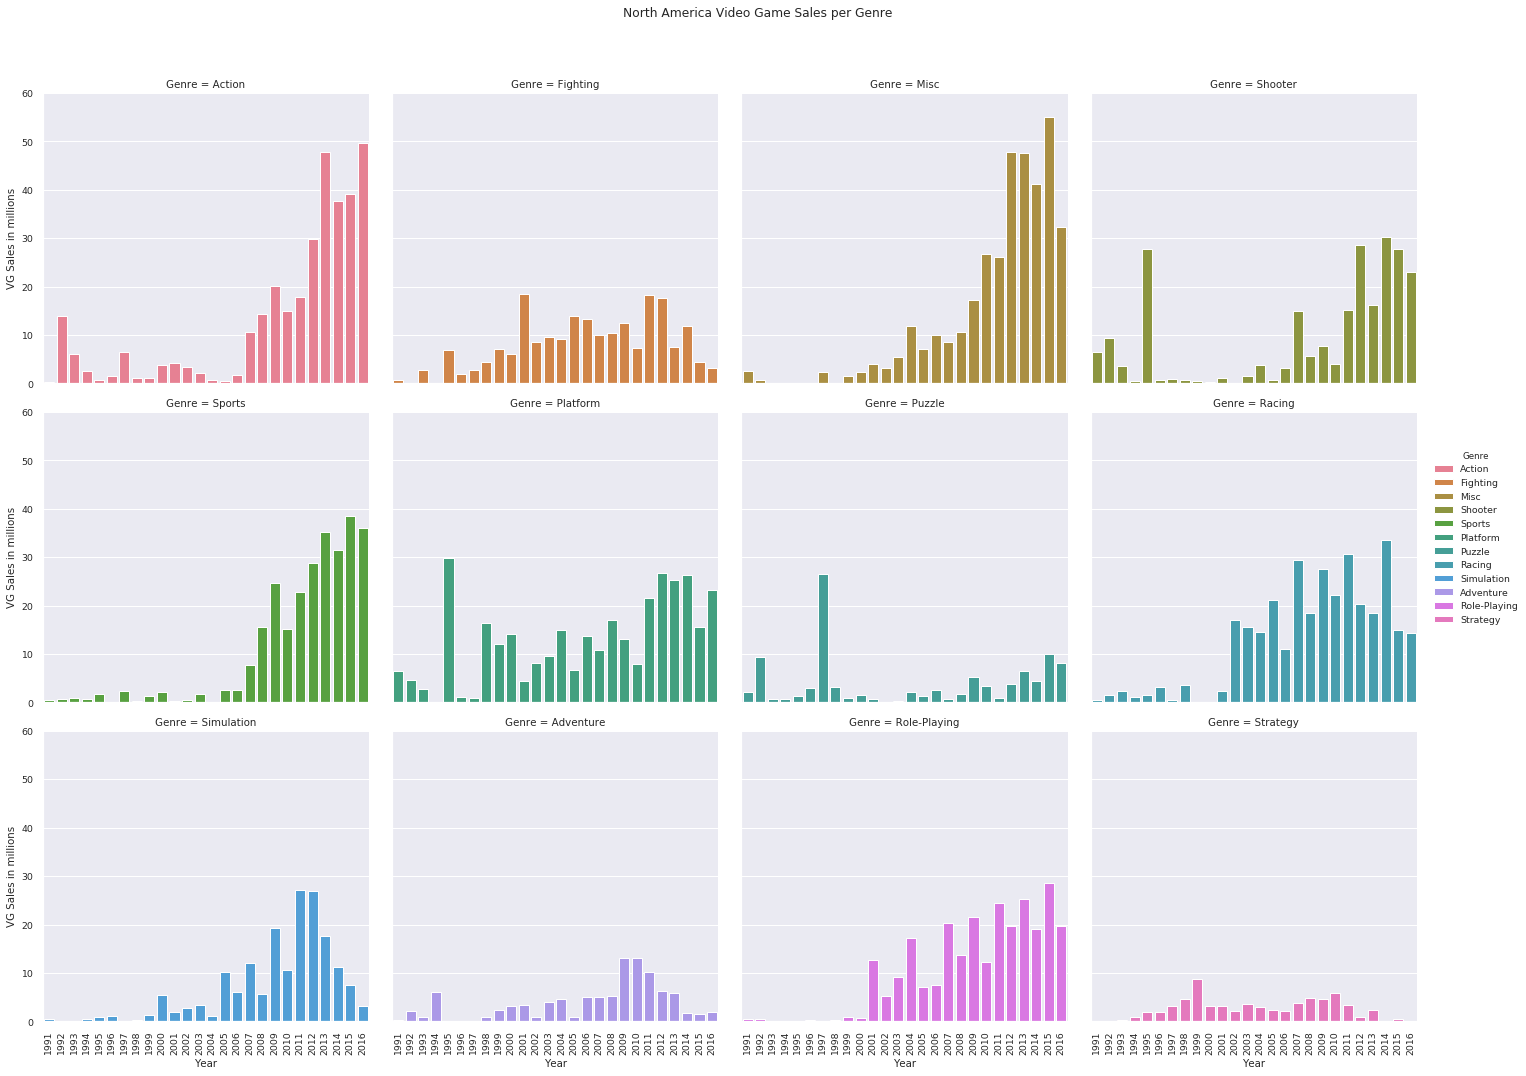

In [0]:
VG_TSNA=VG[['Year','Genre','NA_Sales']]
x=VG_TSNA.groupby(['Year','Genre']).sum()
x.reset_index(level=[0,1],inplace=True)

sns.set(font_scale=0.85)

g = sns.FacetGrid(x, col="Genre", hue='Genre', margin_titles=True,
                height=5, col_wrap=4,)
g = g.map(sns.barplot, 'Year', 'NA_Sales')

g.set(ylim=(0, 60))
g.add_legend()
g.set_xticklabels(rotation=90, ha="center")
g.set_ylabels('VG Sales in millions')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('North America Video Game Sales per Genre')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Europe Video Game Sales per Genre')

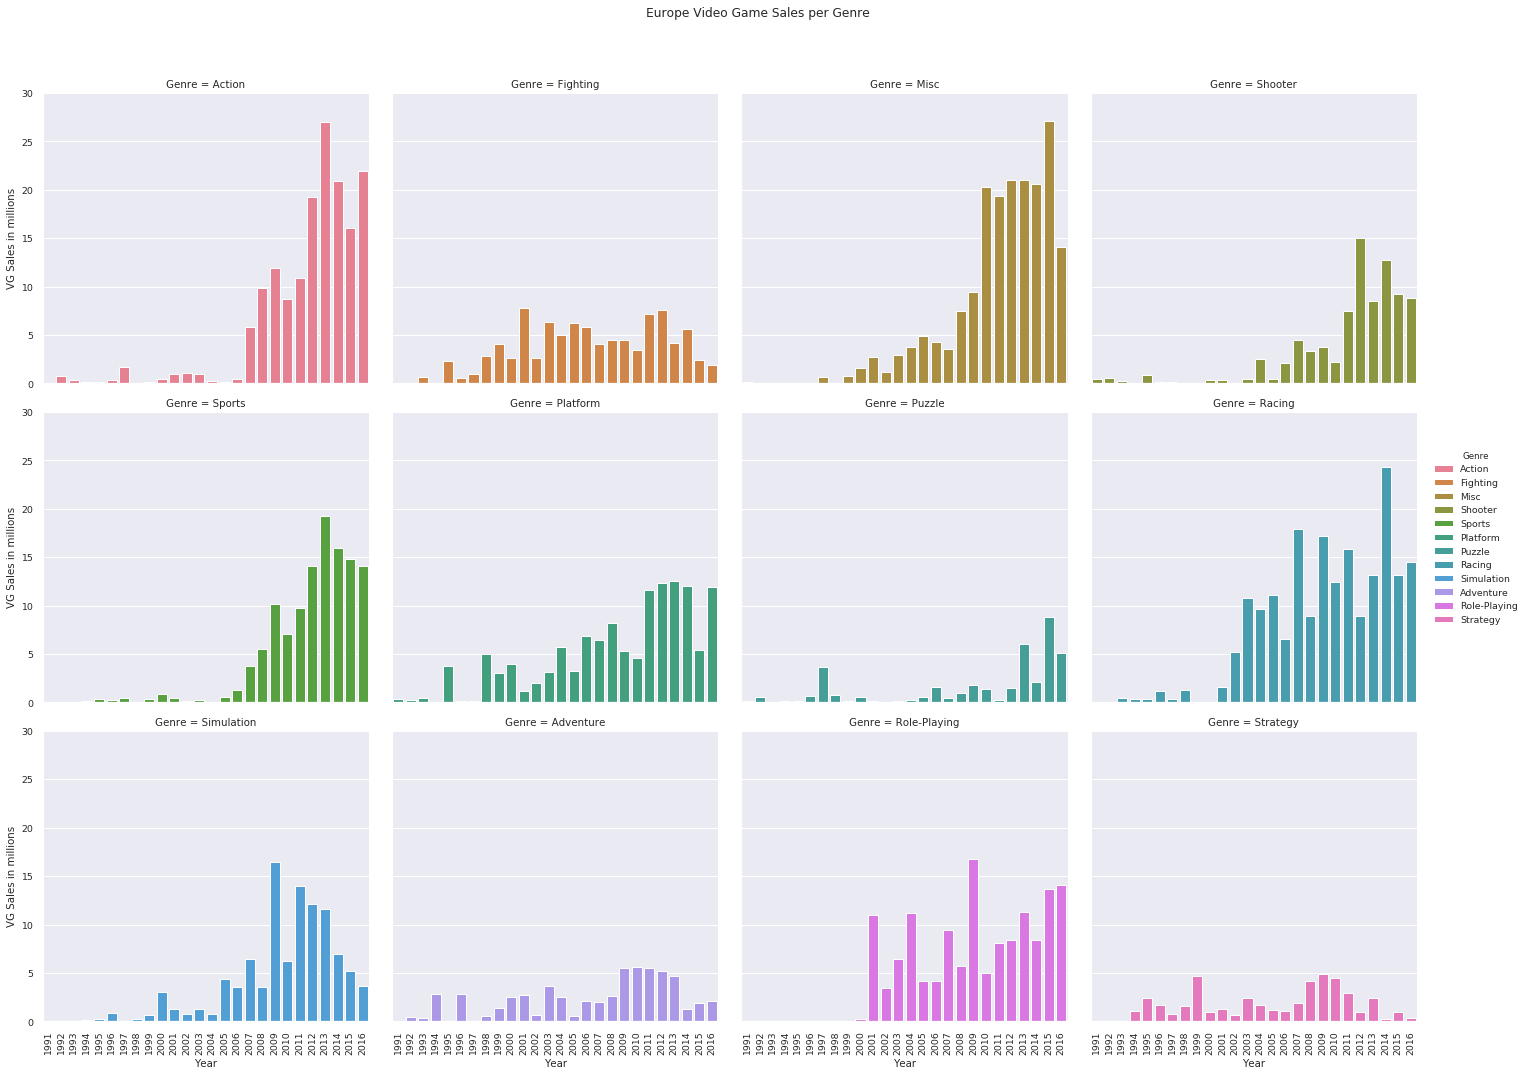

In [0]:
VG_TSEU=VG[['Year','Genre','EU_Sales']]
x=VG_TSEU.groupby(['Year','Genre']).sum()
x.reset_index(level=[0,1],inplace=True)

sns.set(font_scale=0.85)

g = sns.FacetGrid(x, col="Genre", hue='Genre', margin_titles=True,
                height=5, col_wrap=4,)
g = g.map(sns.barplot, 'Year', 'EU_Sales')

g.set(ylim=(0, 30))
g.add_legend()
g.set_xticklabels(rotation=90, ha="center")
g.set_ylabels('VG Sales in millions')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Europe Video Game Sales per Genre')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Japan Video Game Sales per Genre')

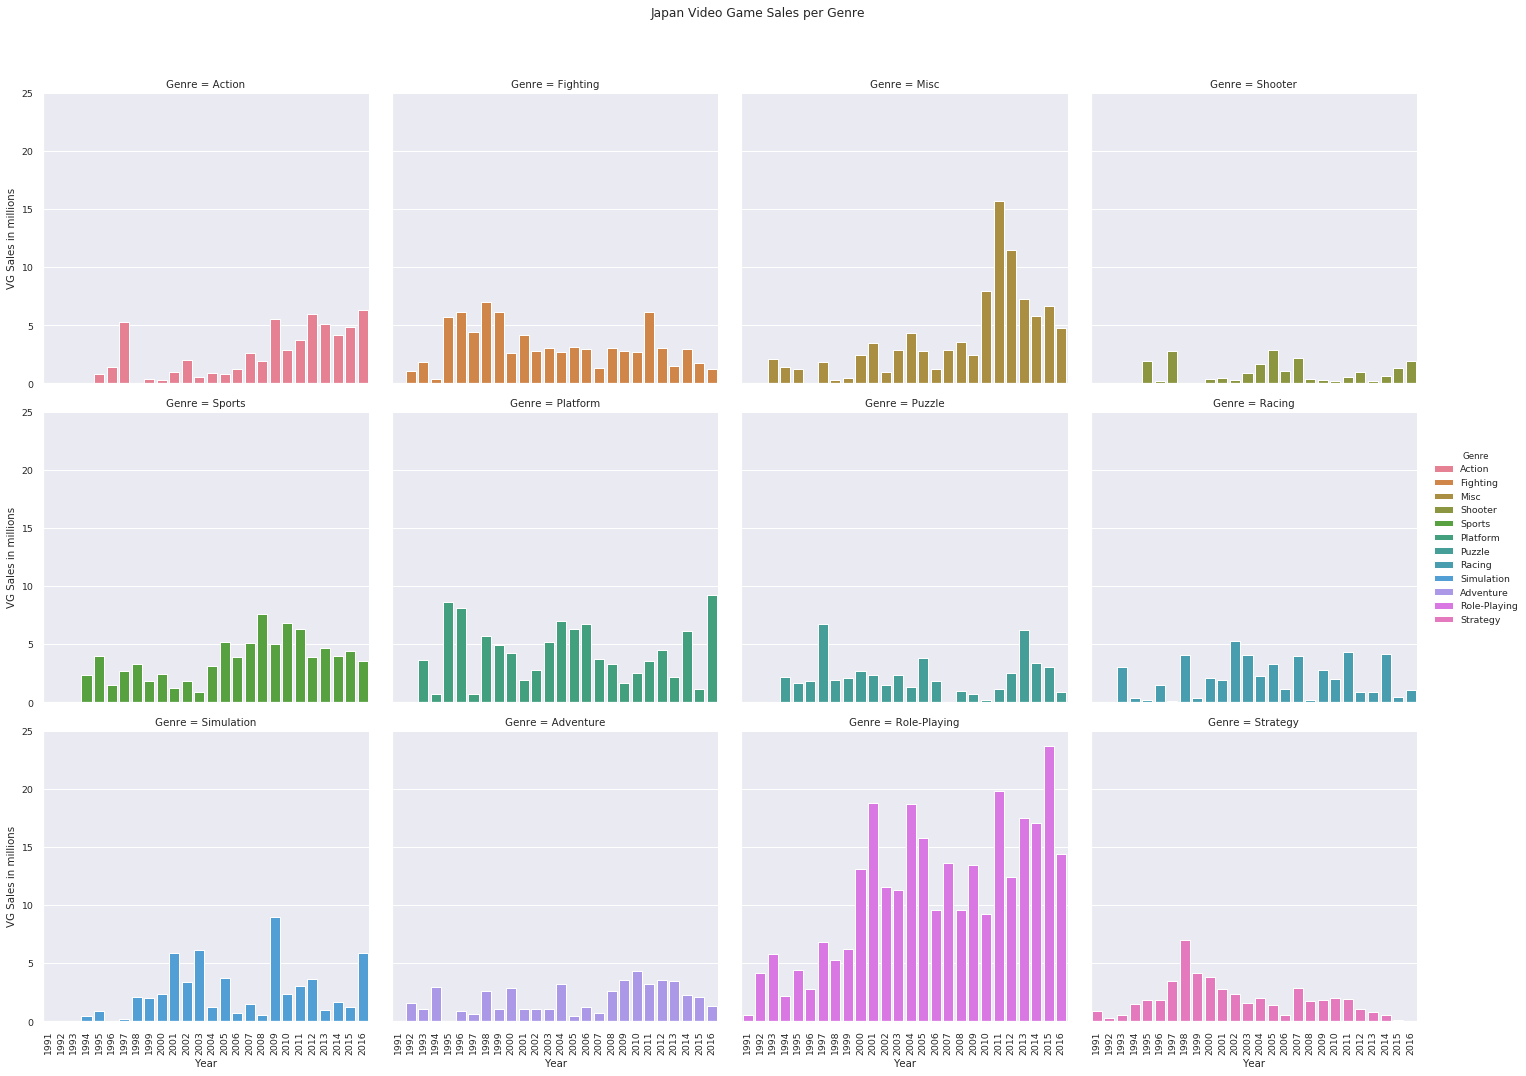

In [0]:
VG_TSEU=VG[['Year','Genre','JP_Sales']]
x=VG_TSEU.groupby(['Year','Genre']).sum()
x.reset_index(level=[0,1],inplace=True)

sns.set(font_scale=0.85)

g = sns.FacetGrid(x, col="Genre", hue='Genre', margin_titles=True,
                height=5, col_wrap=4,)
g = g.map(sns.barplot, 'Year', 'JP_Sales')

g.set(ylim=(0, 25))
g.add_legend()
g.set_xticklabels(rotation=90, ha="center")
g.set_ylabels('VG Sales in millions')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Japan Video Game Sales per Genre')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Other countries Video Game Sales per Genre')

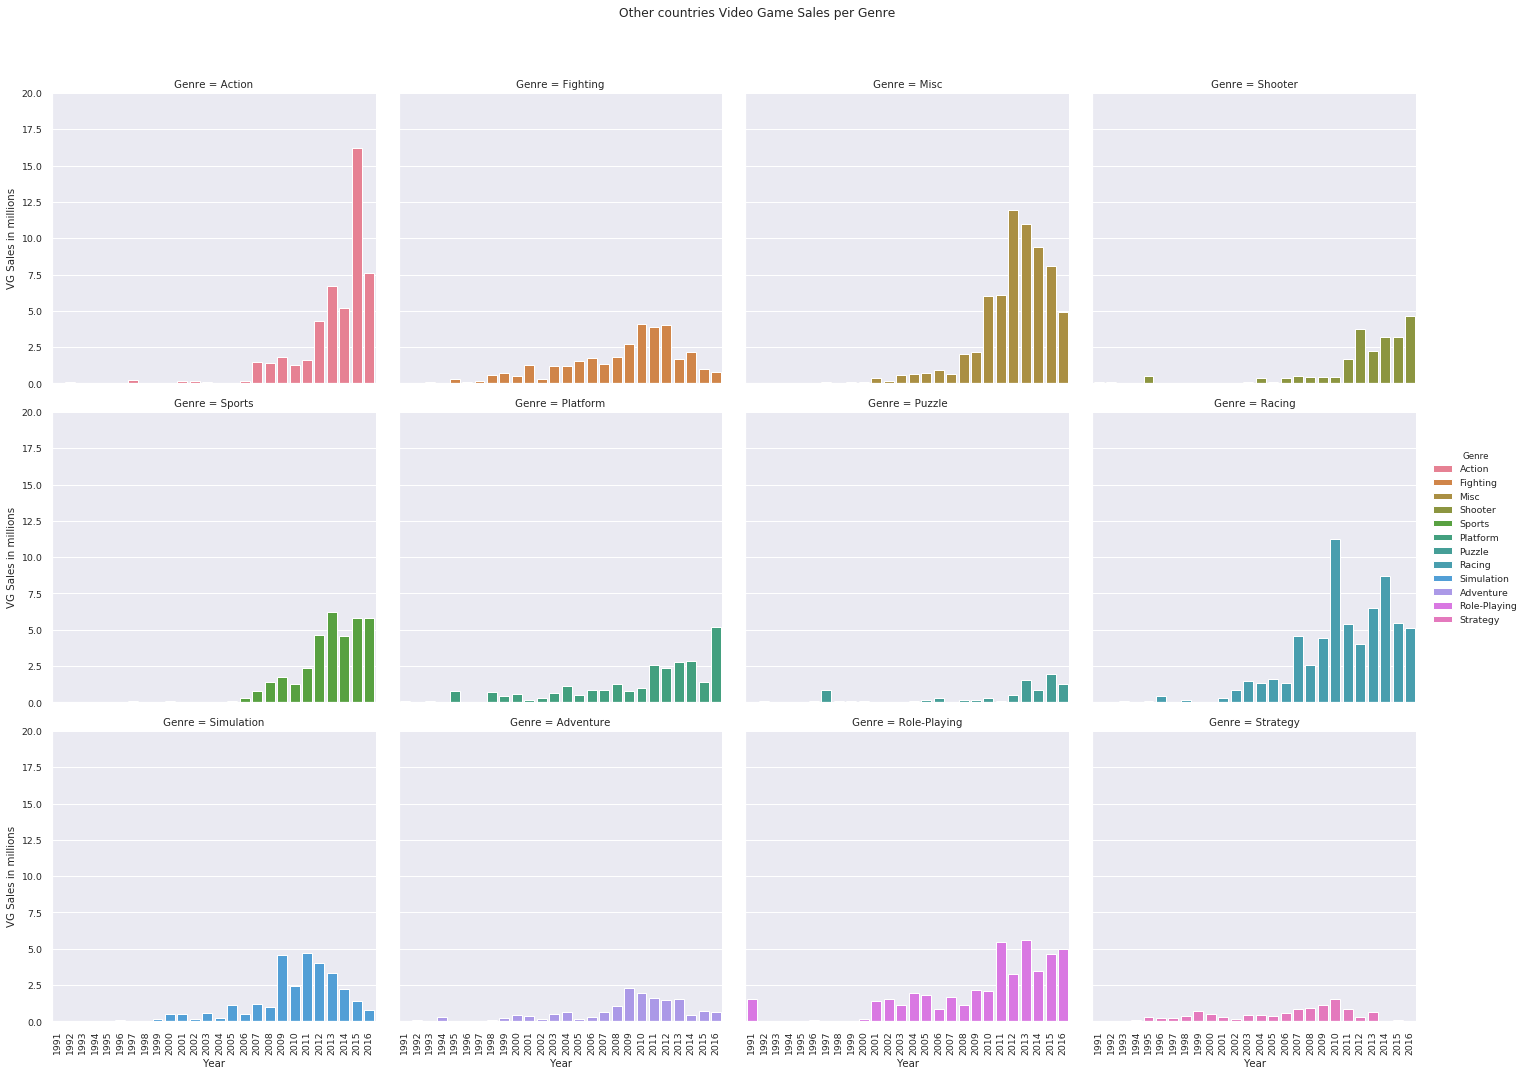

In [0]:
VG_TSEU=VG[['Year','Genre','Other_Sales']]
x=VG_TSEU.groupby(['Year','Genre']).sum()
x.reset_index(level=[0,1],inplace=True)

sns.set(font_scale=0.85)

g = sns.FacetGrid(x, col="Genre", hue='Genre', margin_titles=True,
                height=5, col_wrap=4,)
g = g.map(sns.barplot, 'Year', 'Other_Sales')

g.set(ylim=(0, 20))
g.add_legend()
g.set_xticklabels(rotation=90, ha="center")
g.set_ylabels('VG Sales in millions')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Other countries Video Game Sales per Genre')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


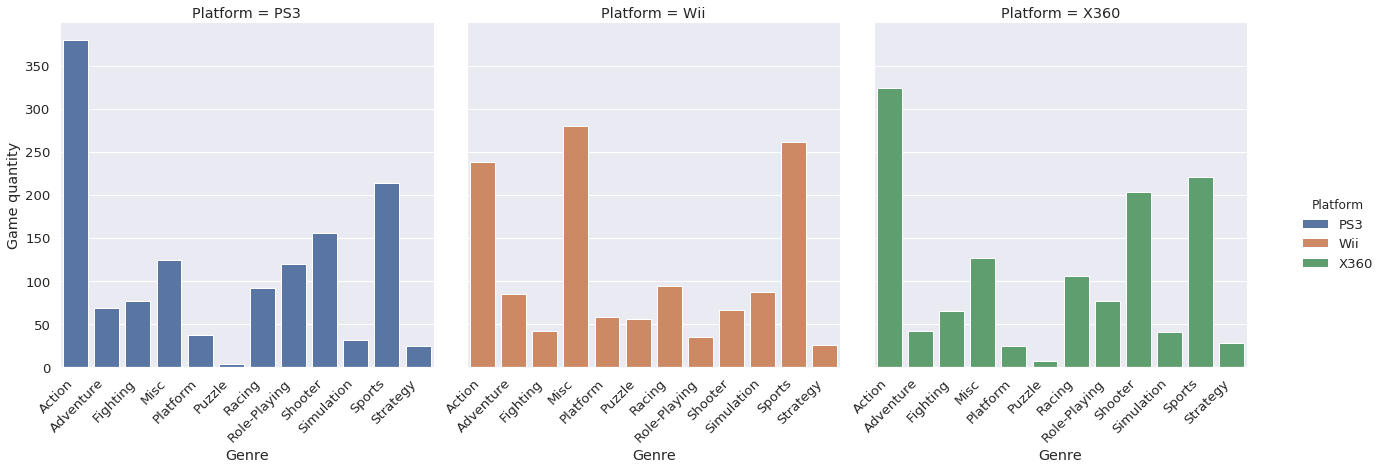

In [0]:
sns.set(font_scale=1.2)

VG1 = VG1.sort_values(['Platform', 'Genre'], ascending=[True, True])

g=sns.FacetGrid(VG1, col="Platform", hue='Platform', margin_titles=True,
                height=6)
g.map(sns.countplot, 'Genre')

g.add_legend()
g.set_xticklabels(rotation=45, ha="right")
g.set_ylabels("Game quantity")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


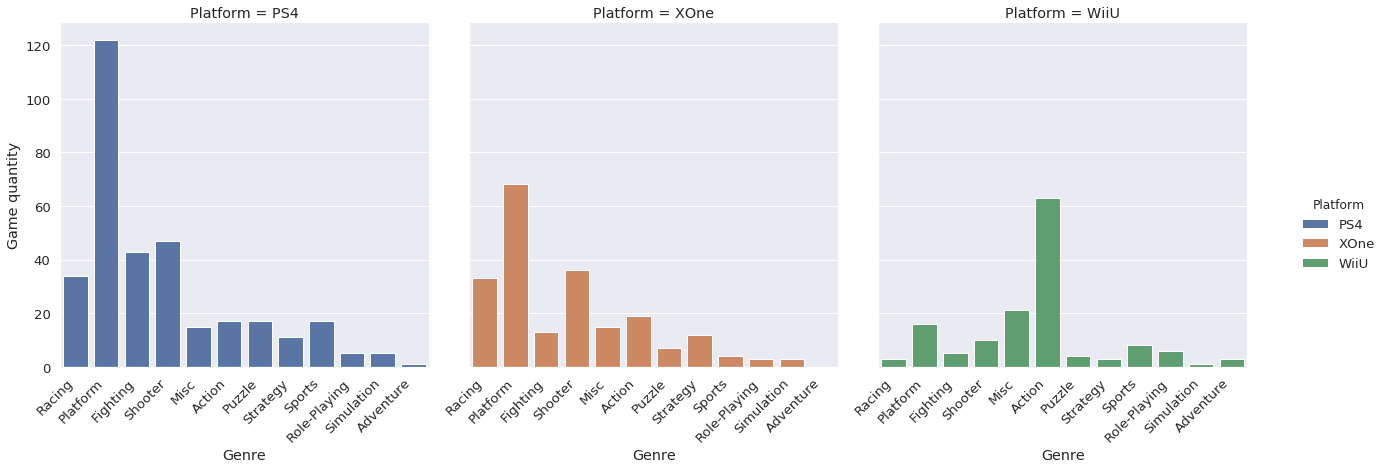

In [0]:
sns.set(font_scale=1.2)

#VG2 = VG2.sort_values(['Platform', 'Genre'], ascending=[True, True])

g=sns.FacetGrid(VG2, col="Platform", hue='Platform', margin_titles=True,
                height=6)
g.map(sns.countplot, 'Genre')

g.add_legend()
g.set_xticklabels(rotation=45, ha="right")
g.set_ylabels("Game quantity")

Text(0.5, 1.0, 'Wii')

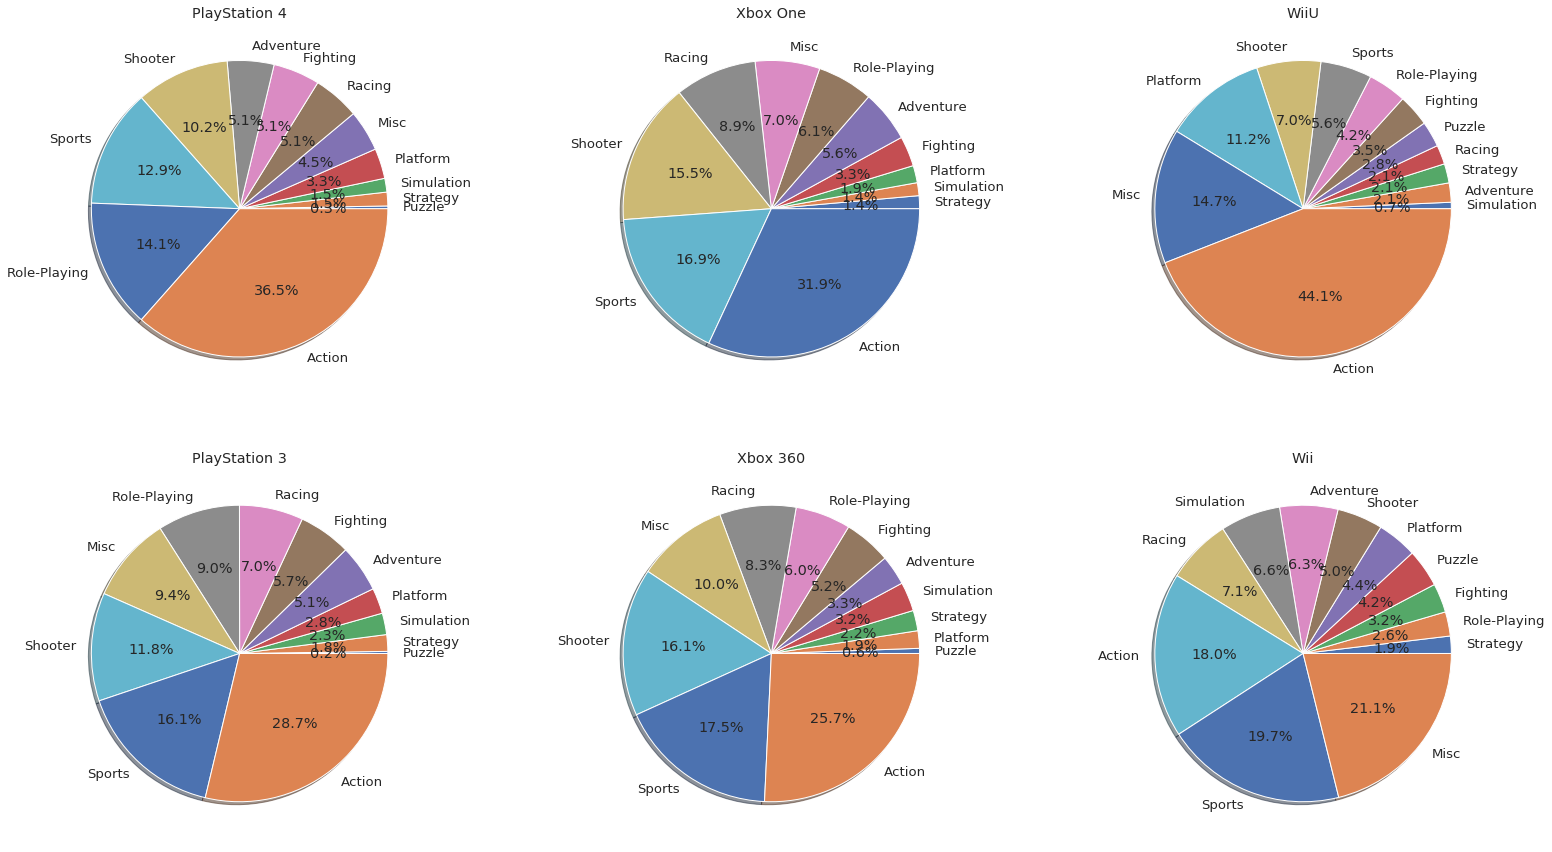

In [0]:
VGP = VG[['Name','Platform','Genre']]
VGP = VGP.groupby(['Platform','Genre']).count()
VGP.reset_index(level=[0,1],inplace=True)
VGP.rename(columns={'Name': 'Count'},inplace=True)
VGP=VGP.sort_values(['Count'], ascending=[True])

fig = plt.figure(figsize=(27,15))

# First plot
fig.add_subplot(2,3,1)
plt.axis('equal') 
plt.pie(x='Count', data=VGP[VGP.Platform == 'PS4'], labels='Genre',shadow=True,autopct='%1.1f%%')
plt.title("PlayStation 4")

# Second plot
fig.add_subplot(2,3,2)
plt.axis('equal') 
plt.pie(x='Count', data=VGP[VGP.Platform == 'XOne'], labels='Genre',shadow=True,autopct='%1.1f%%')
plt.title("Xbox One")

# Third plot
fig.add_subplot(2,3,3)
plt.axis('equal') 
plt.pie(x='Count', data=VGP[VGP.Platform == 'WiiU'], labels='Genre',shadow=True,autopct='%1.1f%%')
plt.title("WiiU")

# First plot
fig.add_subplot(2,3,4)
plt.axis('equal') 
plt.pie(x='Count', data=VGP[VGP.Platform == 'PS3'], labels='Genre',shadow=True,autopct='%1.1f%%')
plt.title("PlayStation 3")

# Second plot
fig.add_subplot(2,3,5)
plt.axis('equal') 
plt.pie(x='Count', data=VGP[VGP.Platform == 'X360'], labels='Genre',shadow=True,autopct='%1.1f%%')
plt.title("Xbox 360")

# Third plot
fig.add_subplot(2,3,6)
plt.axis('equal')
plt.pie(x='Count', data=VGP[VGP.Platform == 'Wii'], labels='Genre',shadow=True,autopct='%1.1f%%')
plt.title("Wii")


#gpie = plt.pie(x='Count', data=VGP[VGP.Platform == 'PS4'], labels='Platform',shadow=True,sub)


In [0]:
VGP[VGP.Platform.isin(['PS3','PS4'])]


,Platform,Genre,Count
170,PS4,Puzzle,1
158,PS3,Puzzle,3
176,PS4,Strategy,5
174,PS4,Simulation,5
169,PS4,Platform,11
168,PS4,Misc,15
171,PS4,Racing,17
167,PS4,Fighting,17
166,PS4,Adventure,17
164,PS3,Strategy,24
